In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_regression

In [4]:
X, Y = make_regression(n_samples=10000, n_features=20, n_informative=20, noise=10, random_state=1)

In [5]:
## Since mean is not 0 and std is not 1 we need to normalize the data
u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)

X = (X-u)/std

In [6]:
## adding X0 for theta0 to the X array
X0 = np.ones((X.shape[0], 1))
X = np.hstack((X0, X))

In [7]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [8]:
def error(X, Y, theta):
    e = 0.0
    m = X.shape[0]
    Y_ = hypothesis(X, theta)
    e = np.sum((Y - Y_)**2)
    
    return e/m

In [9]:
def gradient(X, Y, theta):
    m = X.shape[0]
    Y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (Y_ - Y))
    
    return grad/m

In [46]:
def gradientDescent(X, Y, learning_rate = 0.01, max_epochs = 300):
    m = X.shape[0]
    n = X.shape[1]
    
    theta = np.zeros((n,))
    theta_list = []
    error_list = []
    
    for i in range(max_epochs):
        grad = gradient(X, Y, theta)
        theta = theta - (learning_rate*grad)
        theta_list.append(theta)
        
        e = error(X, Y, theta)
        error_list.append(e)
        
    return theta_list, error_list

In [47]:
def batchGradientDescent(X, Y, batch_size = 200, learning_rate = 0.01, max_epochs = 10):
    m = X.shape[0]
    n = X.shape[1]
    
    theta = np.zeros((n,))
    theta_list = []
    error_list = []
    
    ## stacking X and Y to shuffle the data 
    data = np.hstack((X, Y.reshape(-1,1)))
    
    for i in range(max_epochs):
        np.random.shuffle(data)
        total_batches = m//batch_size
        
        for j in range(total_batches):
            batch_data = data[j*batch_size:(j+1)*batch_size, :]
            X_batch = batch_data[:,:-1]
            Y_batch = batch_data[:,-1]
            
            batch_grad = gradient(X_batch, Y_batch, theta)
            theta = theta - (learning_rate*batch_grad)
            theta_list.append(theta)

            e = error(X, Y, theta)
            error_list.append(e)
        
    return theta_list, error_list

In [59]:
start = time.time()
batch_theta, batch_error = batchGradientDescent(X, Y, batch_size = 20, learning_rate = 0.1, max_epochs = 1)
end = time.time()

print(end-start)

0.5906772613525391


In [49]:
start = time.time()
theta_list, error_list = gradientDescent(X, Y)
end = time.time()

print(end-start)

0.40376973152160645


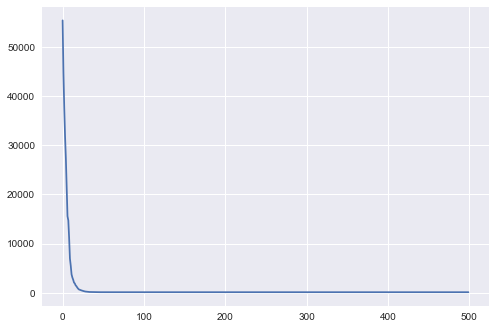

In [60]:
plt.figure()
plt.plot(np.arange(len(batch_error)), batch_error)
plt.show()

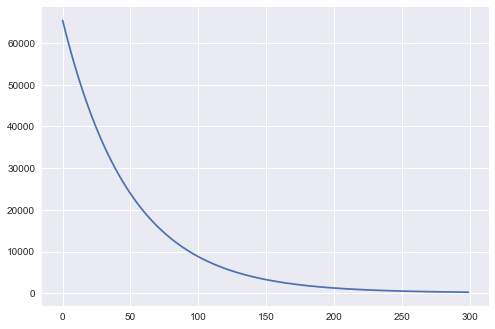

In [51]:
plt.figure()
plt.plot(np.arange(len(error_list)), error_list)
plt.show()

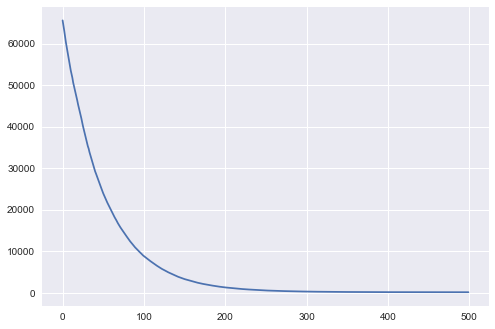

In [52]:
plt.style.use("seaborn")
plt.plot(batch_error)
plt.show()

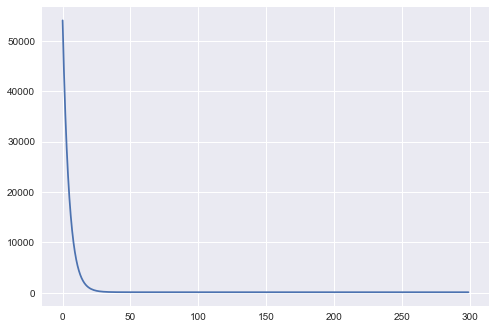

In [32]:
plt.style.use("seaborn")
plt.plot(error_list)
plt.show()

In [20]:
Y_ = hypothesis(X, theta_list[299])

In [21]:
def r2_score(Y_, Y):
    num = np.sum((Y_ - Y)**2)
    denomi = np.sum((Y.mean() - Y)**2)
    
    score = 1 - num/denomi
    
    return score*100

In [22]:
r2_score(Y_, Y)

99.84798017899172

In [36]:
Y_b = hypothesis(X, batch_theta[len(batch_theta)-1])

In [37]:
r2_score(Y_b, Y)

99.84356502121014

In [44]:
len(batch_error)

500